In [1]:
%cd C:\Users\debie\Documents\anaconda_space

C:\Users\debie\Documents\anaconda_space


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Star Wars Survey

We are gonna explore a survey about Star Wars movie series. This survey was made by the website FiveThirtyEight as they were curious about what Star Wars fans had to say about the franchise. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch ?

In [3]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

From the informations shown above we can see that some columns' names are not enough meaningful, that is to say the "Unnamed" ones.

We can infer the meaning of some of them. The columns Unnamed 4 to 8 are related to which movie the respondent has seen. Starting from Unnamed 4 being Star Wars episode II to Unnamed 8 being Star Wars episode VI. The column before Unnamed 4 which is named "Which of the following Star Wars films have you seen? Please select all that apply." corresponds to Star Wars episode I.

Then we have the columns starting from "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film." to "Unnamed 14" which contains the rank in order of preference of the movies seen by the respondent.

Finally we have the columns from "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her." to "Unnamed 27" which contains the opinion of the respondent about some characters but we do not have the character name for each column.

The 2 columns: "Have you seen any of the 6 films in the Star Wars franchise?" and "Do you consider yourself to be a fan of the Star Wars film franchise?" have "Yes", "No" or Nan as values, let's convert this values into Boolean types with True for "Yes" and False for "No".

In [5]:
yes_no = {"Yes" : True, "No" : False}
q_col = ['Have you seen any of the 6 films in the Star Wars franchise?','Do you consider yourself to be a fan of the Star Wars film franchise?']

star_wars[q_col[0]] =  star_wars[q_col[0]].map(yes_no)
star_wars[q_col[1]] =  star_wars[q_col[1]].map(yes_no)
star_wars[q_col].head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
0,True,True
1,False,NaN
2,True,False
3,True,True
4,True,True


Now we rename and convert into boolean types the columns which ask the respondent which Star Wars movies they have seen.

In [6]:
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4": "seen_2",
    "Unnamed: 5": "seen_3",
    "Unnamed: 6": "seen_4",
    "Unnamed: 7": "seen_5",
    "Unnamed: 8": "seen_6"
})

movie_seen = [{
    "Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False
},{
    "Star Wars: Episode II  Attack of the Clones": True,
    np.NaN: False
},{
    "Star Wars: Episode III  Revenge of the Sith": True,
    np.NaN: False
},{
    "Star Wars: Episode IV  A New Hope": True,
    np.NaN: False
},{
    "Star Wars: Episode V The Empire Strikes Back": True,
    np.NaN: False
},{
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}]

for i in range(6):
    star_wars['seen_'+str(i+1)] =  star_wars['seen_'+str(i+1)].map(movie_seen[i])


star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Here we will rename the columns "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film." to "Unnamed 14" into something mor meaningfull, as well as convert their values into numeric type.

In [7]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
})
star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


<AxesSubplot:>

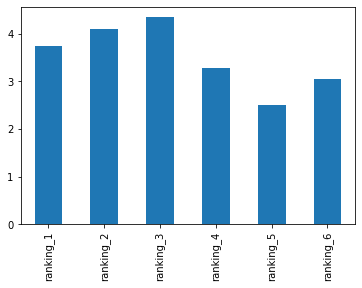

In [8]:
ranking_c = ['ranking_' + str(i) for i in range(1,7)]
ranking_mean = star_wars[ranking_c].mean()
print(ranking_mean)
ranking_mean.plot(kind='bar')

In the graphic above it is important to note that a lower ranking is better.

Let's look into how many times each movies have been watch by the respondents.

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


<AxesSubplot:>

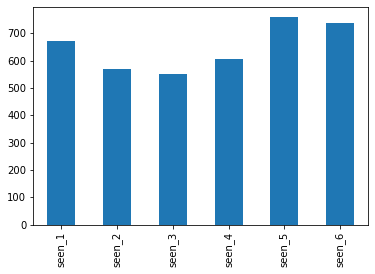

In [9]:
seen_c = ['seen_' + str(i) for i in range(1,7)]
seen_tot = star_wars[seen_c].sum()
print(seen_tot)
seen_tot.plot(kind='bar')

It seems like the most seen movies are also the one that have the best ranking.

Now we will do the same analyzes but with groups based on some parmaeters.

First, the gender:

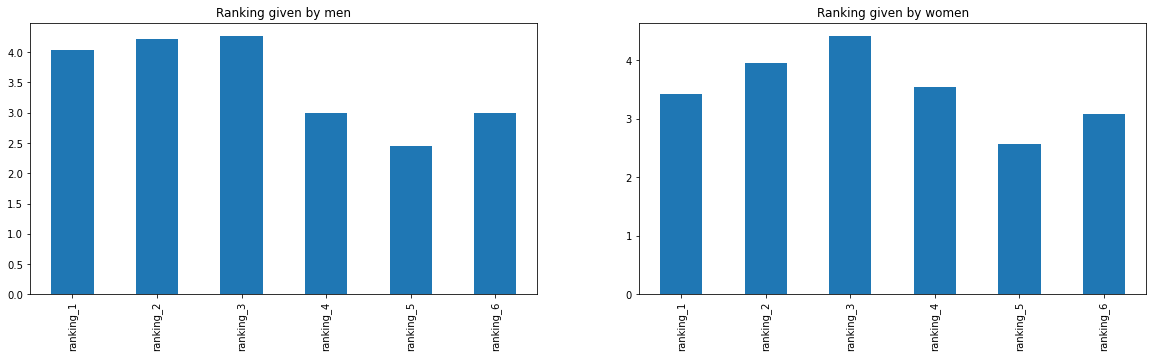

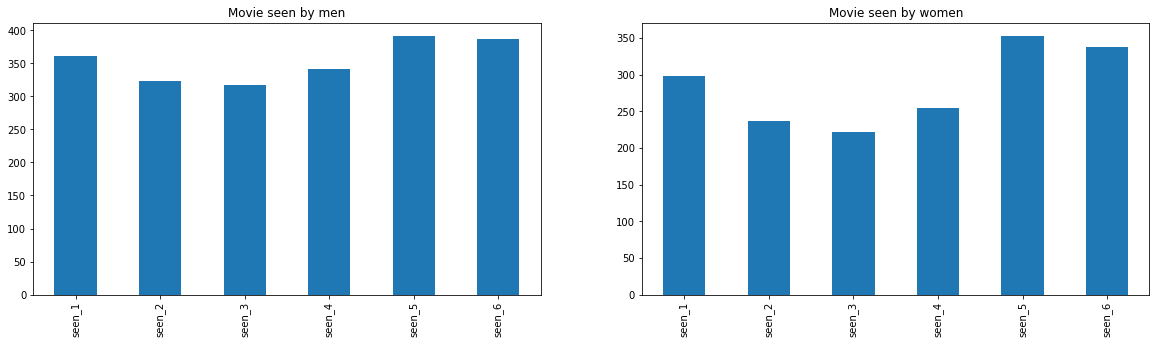

In [49]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

plt.figure(figsize=(20,5))
ranking_male = males[ranking_c].mean()
plt.subplot(1,2,1)
ranking_male.plot(kind='bar')
plt.title('Ranking given by men')
ranking_female = females[ranking_c].mean()
plt.subplot(1,2,2)
ranking_female.plot(kind='bar')
plt.title('Ranking given by women')
plt.show()

plt.figure(figsize=(20,5))
seen_male = males[seen_c].sum()
plt.subplot(1,2,1)
seen_male.plot(kind='bar')
plt.title('Movie seen by men')
seen_female = females[seen_c].sum()
plt.subplot(1,2,2)
seen_female.plot(kind='bar')
plt.title('Movie seen by women')
plt.show()

For ranks, a vast amount of men seems to think that the trilogy (movies 4, 5 and 6) is much better than the prelogy (movies 1, 2 and 3). As for women, we can see that in average they think that the trilogy is better than the prelogy, but is just less clear. But for all gender, the best movie is the 5th.

For the Star-Wars movies seen by each categories, men and women have both seen the most the 5th and 6th movies. As for the 4 other movies, the amount of men who have seen them is quite similar, but the same value for the woman is more disparate.

Let's take a look at the same question for the several age categories.

In [12]:
star_wars['Age'].value_counts()

45-60    291
> 60     269
30-44    268
18-29    218
Name: Age, dtype: int64

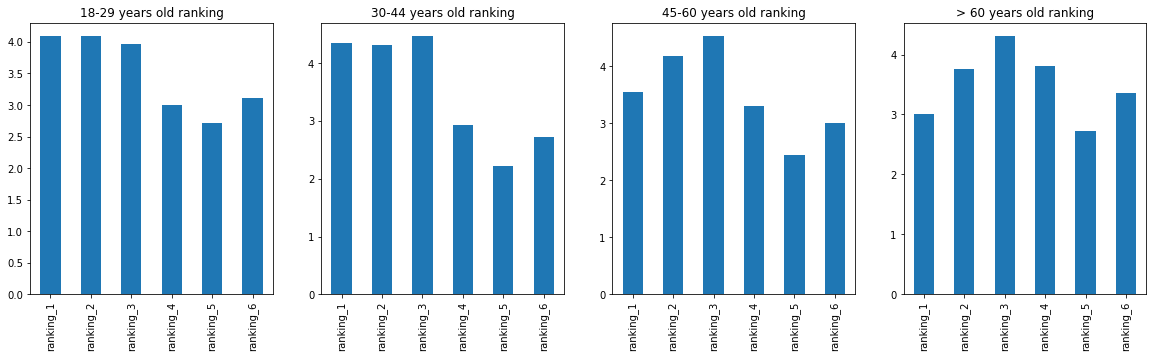

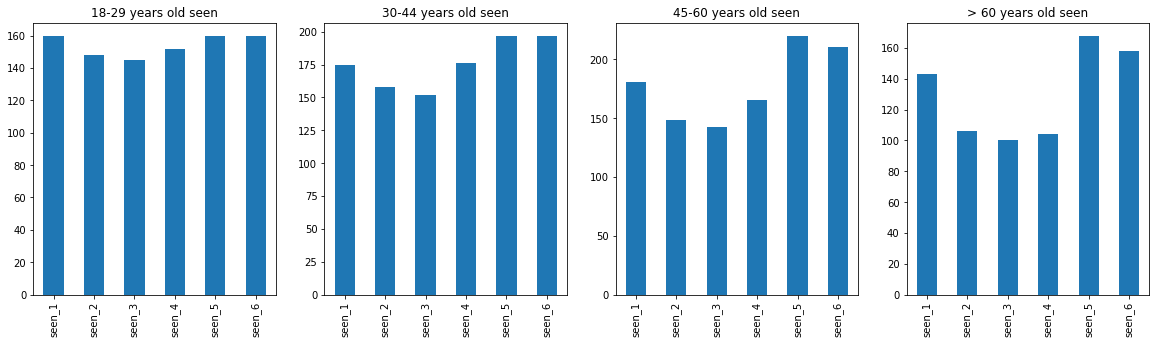

In [45]:
age_category = ["18-29", "30-44", "45-60", "> 60"]

plt.figure(figsize=(20,5))

i = 1
for cat in age_category:
    catego = star_wars[star_wars["Age"] == cat]
    ranking_age = catego[ranking_c].mean()
    plt.subplot(1,4,i)
    ranking_age.plot(kind='bar')
    plt.title('{0} years old ranking'.format(cat))
    i += 1
plt.show()

plt.figure(figsize=(20,5))
i = 1
for cat in age_category:
    catego = star_wars[star_wars["Age"] == cat]
    seen_age = catego[seen_c].sum()
    plt.subplot(1,4,i)
    seen_age.plot(kind='bar')
    plt.title('{0} years old seen'.format(cat))
    i += 1
plt.show()


For all the age categories, the best ranked movie is the 5th, and except for the group older than 60, the second and third place are always taken by the 4th and 6th movies.

For the younger generation (less than 44 years old) we see a strong separation between the trilogy and the prelogy in term of ranking: the trilogy is much more liked.

The movies that are seen the most by everyone is the 5th and the 6th. The more we advance in age, the less the 2nd, 3rd and 4th movies have been seen.

In conclusion, we can say that generally speaking, the 5th movie is the most liked, as the FiveThirtyEight website team wanted to confirm.